# FraudF

## Context
Credit card fraud is prevalant and a costly problem for financial institutions and cardholders. Detecting fraudulent transactionns is crucial for preventing financial loss and ensuring the security of credit card users. 
I this project, I experimented implemented machine learning techniques for fraud detection using a dataset contain credit card transactions.

## Dataset
This dataset contains credit card transactions make by European cardholders in the year 2023. It compromises over 550,000 records, and the data has been anonymized to protect the cardholders' identities.

## Key Features:
- id: Unique identifier for each transaction
- V1-V28: Anonymized features representing various transaction attributes
- Amount: The transaction amount
- Class: Binary label indicating whether the tranfaction is fraud(1) or not(0).

## Goal
The primary goal of this project is to build and evaluate anomaly detection models to identify fraudulent credit card transactions. It includes exploring the dataset, preprocessing the data, and to train multiple machine learning models to detect anomalies in transaction data. The specific objectives include:

1. Data Exploration: Understand the dataset's characteristics, class distribution, and feature relationships.
2. Data Preprocessing: Prepare the data for model training by addressing missing values and scaling features.
3. Model Building: Implement three anomaly detection algorithms - Isolation Forest, Local Outlier Factor, and Support Vector Machine (OneClassSVM).
4. Model Evaluation: Assess the performance of each model using metrics such as accuracy, precision, recall, and F1-score.
5. Observations: Summarize the results and provide insights into the effectiveness of the models for fraud detection.




In [71]:
import numpy as np 
import pandas as pd
import sklearn
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM 
from pylab import rcParams
# setting figure size for matplotlib plots 
rcParams['figure.figsize'] = 14, 8 
# to reproduce
RANDOM_SEED = 42
LABELS = ['Normal', 'Fraud']


In [72]:
data = pd.read_csv('creditcard.csv')
# first few rows of dataset
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [73]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187767 entries, 0 to 187766
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    187767 non-null  float64
 1   V1      187767 non-null  float64
 2   V2      187767 non-null  float64
 3   V3      187767 non-null  float64
 4   V4      187767 non-null  float64
 5   V5      187767 non-null  float64
 6   V6      187767 non-null  float64
 7   V7      187767 non-null  float64
 8   V8      187767 non-null  float64
 9   V9      187767 non-null  float64
 10  V10     187767 non-null  float64
 11  V11     187766 non-null  float64
 12  V12     187766 non-null  float64
 13  V13     187766 non-null  float64
 14  V14     187766 non-null  float64
 15  V15     187766 non-null  float64
 16  V16     187766 non-null  float64
 17  V17     187766 non-null  float64
 18  V18     187766 non-null  float64
 19  V19     187766 non-null  float64
 20  V20     187766 non-null  float64
 21  V21     18

In [74]:
# missing values?
data.isnull().values.any()


True

/tmp/ipykernel_870/2766756433.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

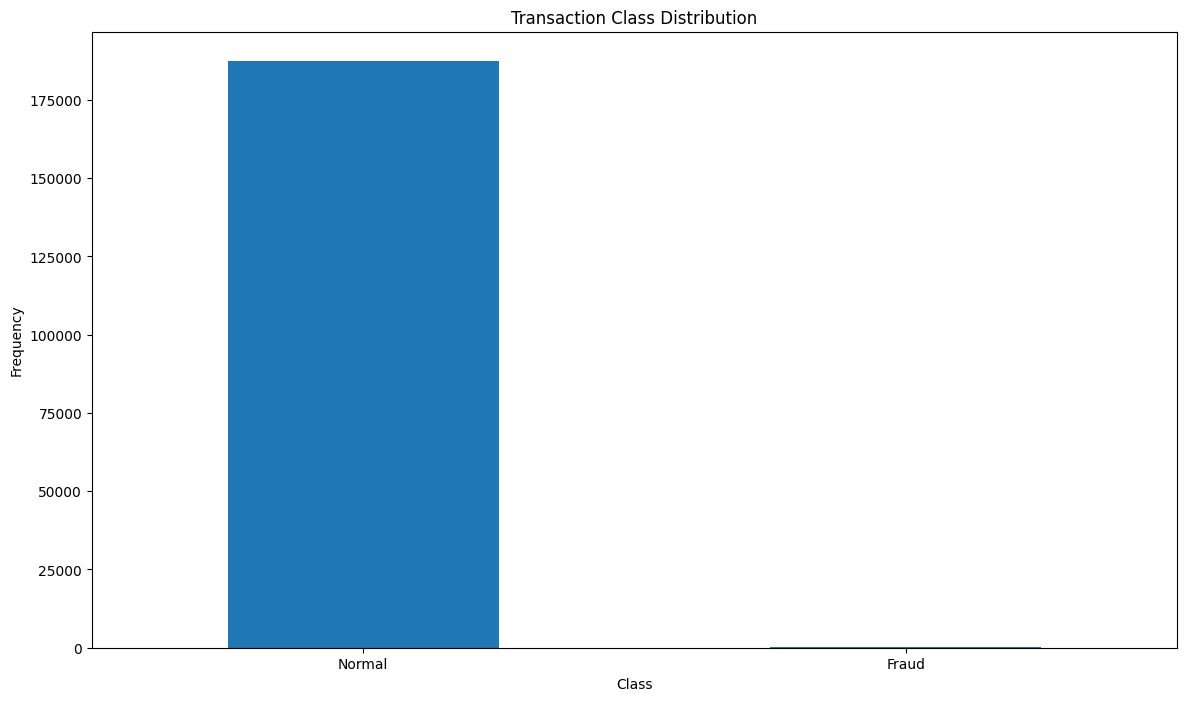

In [75]:
# number of transactions in Noraml and Fraud 
count_classes = pd.value_counts(data['Class'], sort = True)
# bar plot for distribution of transaction class
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [76]:
# seperate DataFrames
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [77]:
print(fraud.shape, normal.shape)


(368, 31) (187398, 31)


In [78]:
# show summary
fraud.Amount.describe()


count     368.000000
mean      115.659891
std       248.444604
min         0.000000
25%         1.000000
50%        11.395000
75%       104.007500
max      2125.870000
Name: Amount, dtype: float64

In [79]:
# show summary
normal.Amount.describe()


count    187398.000000
mean         88.927396
std         247.597918
min           0.000000
25%           5.950000
50%          22.740000
75%          78.987500
max       19656.530000
Name: Amount, dtype: float64

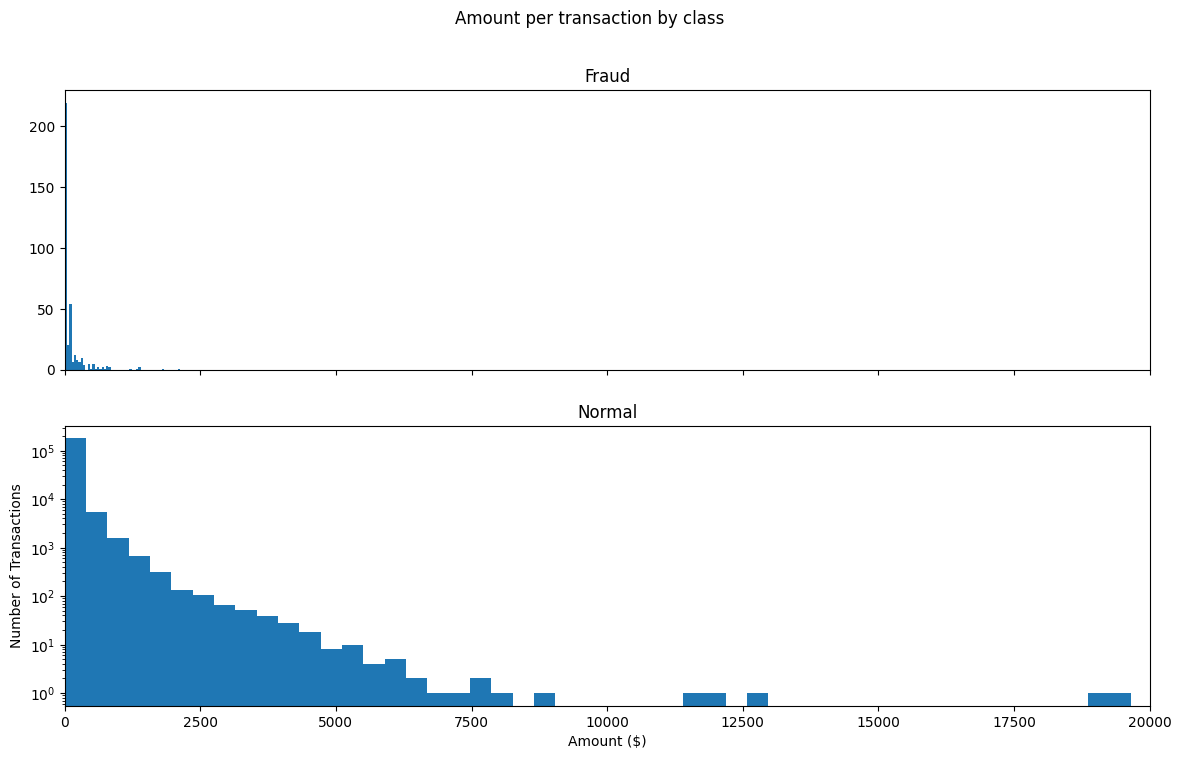

In [80]:
# need subplots for transaction distributions for both classes
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


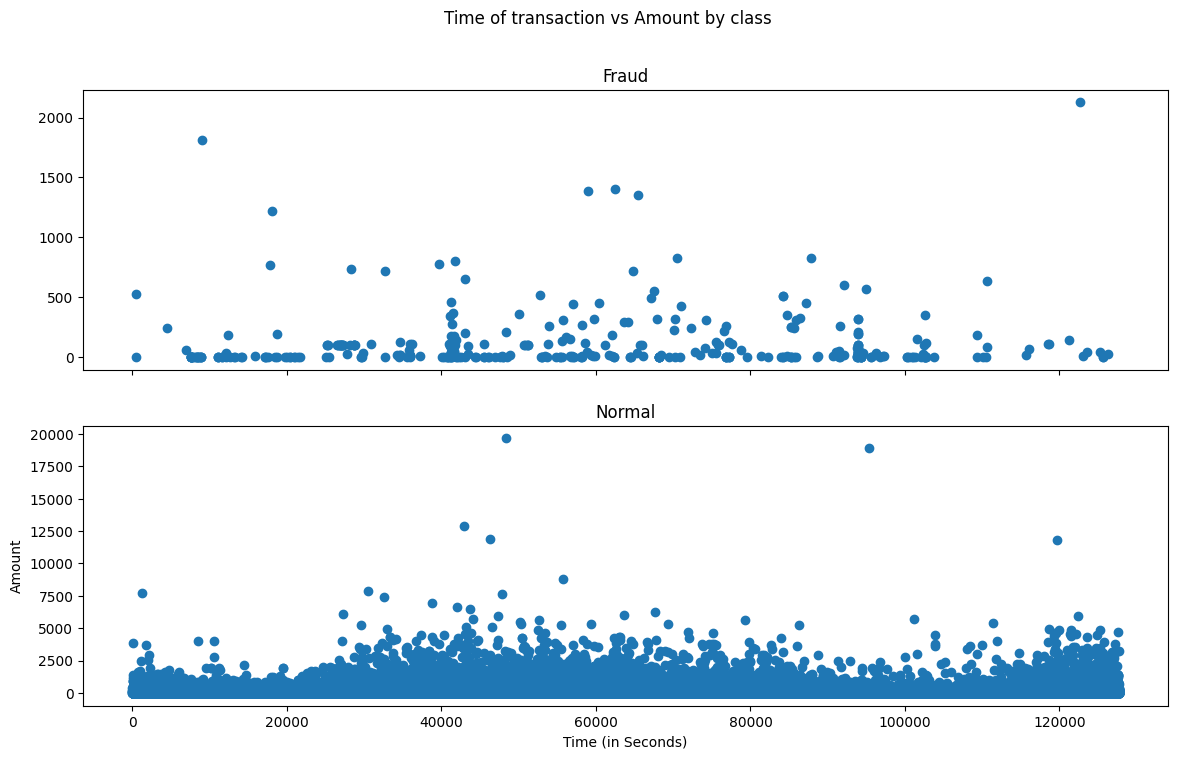

In [81]:
# subplot for relationship between time and amount 
# both classes
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


In [82]:
# 10% of records ramdom selection 
data_random = data.sample(frac = 0.1, random_state = 1)
data_random.shape


(18777, 31)

In [83]:
data.shape


(187767, 31)

In [84]:
fraud = data_random[data_random['Class']==1]
valid = data_random[data_random['Class']==0]
# outlier = fraud to valid ratio
outlier_fraction = len(fraud)/float(len(valid))


In [85]:
print(outlier_fraction)
print("fraud cases : {}".format(len(fraud)))
print("valid case : {}".format(len(valid)))


0.0018674634510724576
fraud cases : 35
valid case : 18742


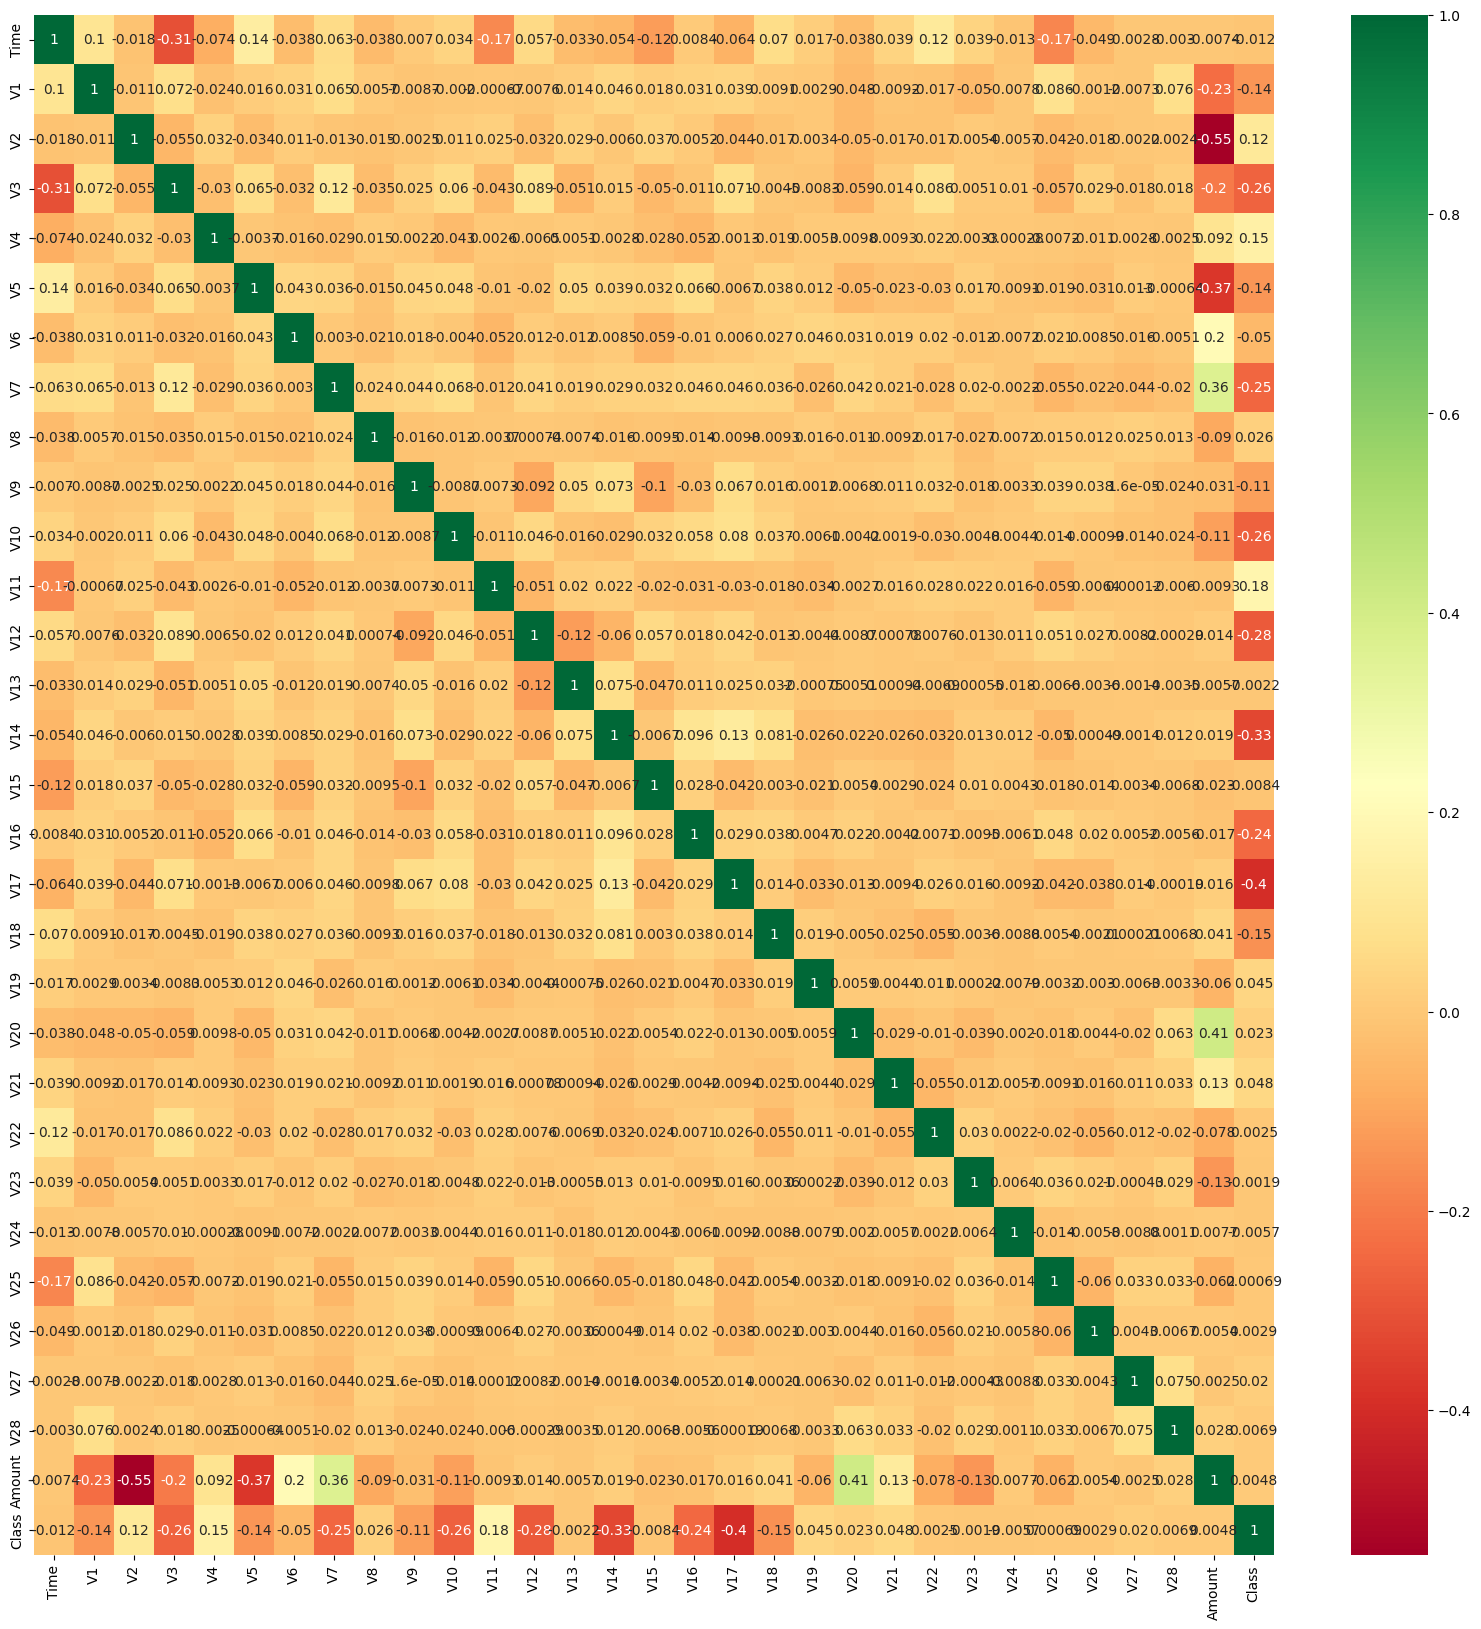

In [86]:
corrmat = data_random.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap="RdYlGn")


In [87]:
columns = datal.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
state = np.random.RandomState(42)
X = datal[columns]
Y = datal[target]
X_outliers = state.uniform(low = 0, high = 1, size = (X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)


(18777, 30)
(18777,)


In [88]:
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, max_iter=-1)
}

In [89]:
type(classifiers)


dict

In [90]:
n_outliers = len(fraud)
# loop through clasifiers
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        # make predictions for Local Outlier Factor
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        # make predictions for Support Vector Machine 
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        # make predictions for Isolation Forest
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    # 1 becomes 0(normal)
    # -1 becomes 1(fraud)    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    # number of errors
    n_errors = (y_pred != Y).sum()
    print("{}: {}".format(clf_name, n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y, y_pred))
    print("Classification Report :")
    print(classification_report(Y, y_pred))
    


Isolation Forest: 47
Accuracy Score :
0.9974969377429834
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18742
         1.0       0.33      0.34      0.34        35

    accuracy                           1.00     18777
   macro avg       0.67      0.67      0.67     18777
weighted avg       1.00      1.00      1.00     18777

Local Outlier Factor: 69
Accuracy Score :
0.9963252915801246
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18742
         1.0       0.03      0.03      0.03        35

    accuracy                           1.00     18777
   macro avg       0.51      0.51      0.51     18777
weighted avg       1.00      1.00      1.00     18777

Support Vector Machine: 10665
Accuracy Score :
0.43201789423230547
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.43 